# LOGISTIC REGRESSION

### Logistic regression is a method used to predict a dependent variable, given a set of independent variables, such that the dependent variable is categorical.
#### Dependent variables (Y): The response binary variable holding values like 0 or 1, Yes or No.
#### Independent variable (X): The predictor variable used to predict the response variable.

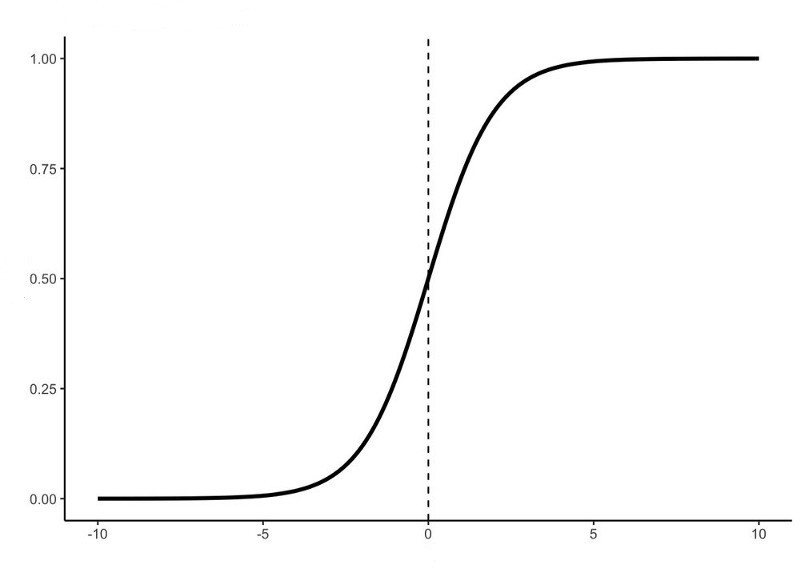

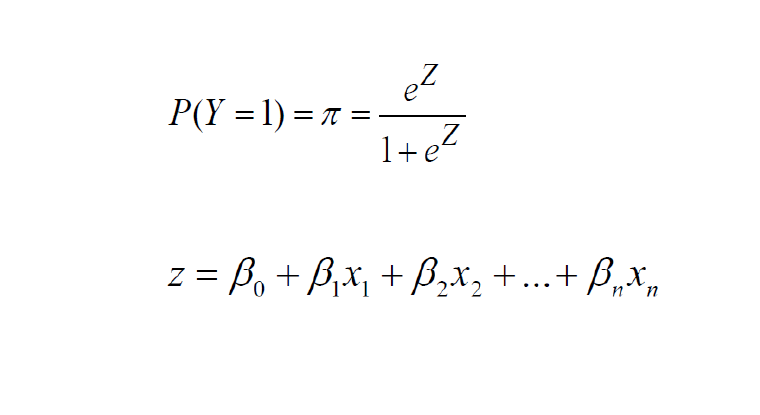

# Phoenix Global Case Study

### Problem Statement:

Phoenix Global has been facing the issue of constant employee attrition Close to 15 % of its employees leave the company and
need to be replaced with the talent pool available in the job market The management believes that this level of attrition
(employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:

* The former employees’ projects get delayed, which makes it difficult to meet timelines

* This is resulting in a reputation loss among consumers and partners

* A sizeable department has to be maintained, for the purposes of recruiting new talent

* More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company.

Hence, the leadership team has employed a special HR analytics team to understand what factors they should focus on, in order
to curb attrition In other words, they want to know what changes they should make to their workplace, in order to get most of
their employees to stay Also, they want to know which of these variables is most important and needs to be addressed right
away.

### Goal of the case study:

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Setting Working Directory

In [2]:
os.chdir(r'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\Pheonix Global Case Study')
os.getcwd()

'G:\\Ivy Pro Data Science, AI and Machine L\\PYTHON\\Pheonix Global Case Study'

## Importing data

#### Employee Survey Data

In [3]:
df_employee_survey = pd.read_csv(r"employee_survey_data.csv")

In [4]:
df_employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
df_employee_survey.shape

(4410, 4)

#### Manager Survey Data

In [6]:
df_manager_survey = pd.read_csv(r"manager_survey_data.csv")

In [7]:
df_manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [8]:
df_manager_survey.shape

(4410, 3)

#### General Data

In [9]:
df_general = pd.read_csv(r"general_data.csv")

In [10]:
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [11]:
df_general.shape

(4410, 24)

#### Employee Intime Data

In [12]:
df_intime = pd.read_csv(r"in_time.csv")
df_intime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [13]:
df_intime = df_intime.replace(np.nan,0)

In [14]:
df_intime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,0.0,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,0.0,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,0.0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,0.0,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,0.0,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,0.0,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,0.0,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,0.0,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,0.0,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [15]:
df_intime.iloc[:, 1:] =df_intime.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [16]:
df_intime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


#### Employee Outtime Data

In [17]:
df_outtime = pd.read_csv(r"out_time.csv")
df_outtime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [18]:
df_outtime = df_outtime.replace(np.nan,0)

In [19]:
df_outtime.iloc[:, 1:] =df_outtime.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [20]:
df_outtime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,1970-01-01 00:00:00,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,1970-01-01,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,1970-01-01,2015-01-02 18:22:17,2015-01-05 17:48:22,1970-01-01 00:00:00,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,1970-01-01 00:00:00,1970-01-01,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,1970-01-01,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,1970-01-01,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,1970-01-01,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,1970-01-01,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,1970-01-01,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,1970-01-01,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [21]:
# Appending the intime data with outtime data
df_intime=df_intime.append(df_outtime)

In [22]:
df_intime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [23]:
df_intime=df_intime.diff(periods=4410)
df_intime=df_intime.iloc[4410:]
df_intime.reset_index(inplace=True)
df_intime.head()

,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,...,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,0 days,07:46:26,07:18:54,07:46:44,07:04:49
1,1,0.0,0 days,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,...,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,0 days,07:36:53,07:58:57,07:59:10,08:13:38
2,2,0.0,0 days,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,...,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,0 days,07:01:26,07:26:20,07:32:20,06:47:11
3,3,0.0,0 days,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,...,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,0 days,07:26:50,07:25:00,07:21:59,07:07:59
4,4,0.0,0 days,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,...,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,0 days,07:39:44,08:16:07,07:57:12,08:01:05


In [24]:
df_intime.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)
df_intime.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,0 days,...,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,0 days,07:46:26,07:18:54,07:46:44,07:04:49
1,0 days,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,0 days,...,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,0 days,07:36:53,07:58:57,07:59:10,08:13:38
2,0 days,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,0 days,...,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,0 days,07:01:26,07:26:20,07:32:20,06:47:11
3,0 days,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,0 days,...,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,0 days,07:26:50,07:25:00,07:21:59,07:07:59
4,0 days,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,0 days,...,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,0 days,07:39:44,08:16:07,07:57:12,08:01:05


In [25]:
df_intime.shape

(4410, 261)

In [26]:
df_intime.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
             ], axis = 1,inplace=True) 

In [27]:
df_intime.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,00:00:00,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49
1,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:55:42,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38
2,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:13:06,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11
3,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:27:21,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59
4,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,08:19:12,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05


##### Extraction of employee hrs

In [28]:
df_intime['Actual Time']=df_intime.mean(axis=1)

In [29]:
df_intime['Actual Time'].head()

0   06:52:12.823293
1   07:18:57.493975
2   06:48:57.891566
3   06:47:21.172690
4   07:52:39.220883
Name: Actual Time, dtype: timedelta64[ns]

In [30]:
df_intime['hrs']=df_intime['Actual Time']/np.timedelta64(1, 'h')
df_intime.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Actual Time,hrs
0,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,06:52:12.823293,6.870229
1,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,07:18:57.493975,7.315971
2,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,06:48:57.891566,6.816081
3,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,06:47:21.172690,6.789215
4,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,07:52:39.220883,7.877561


In [31]:
df_intime.reset_index(inplace=True)
df_intime.head()

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Actual Time,hrs
0,0,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,...,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,06:52:12.823293,6.870229
1,1,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,...,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,07:18:57.493975,7.315971
2,2,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,...,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,06:48:57.891566,6.816081
3,3,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,...,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,06:47:21.172690,6.789215
4,4,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,...,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,07:52:39.220883,7.877561


In [32]:
df_intime.drop(df_intime.columns.difference(['index','hrs']), 1, inplace=True)

In [33]:
df_intime.rename(columns={'index': 'EmployeeID'},inplace=True)
df_intime.head()

,EmployeeID,hrs
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561


#### Merging the all the files

In [34]:
df = pd.merge(df_employee_survey, df_general, how='inner', on='EmployeeID')
df = pd.merge(df_manager_survey, df, how='inner', on='EmployeeID')
df = pd.merge(df_intime, df, how='inner', on='EmployeeID')

#### Final Dataset after merging the files

In [35]:
df.head()

,EmployeeID,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,7.315971,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,6.816081,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,6.789215,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,7.877561,2,3,4.0,4.0,3.0,38,No,Non-Travel,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,10.275802,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,...,4.0,Y,12,8,2,9.0,2,6,0,4


## Data Preprocessing

In [36]:
df.columns

Index(['EmployeeID', 'hrs', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [37]:
# Basic EDA of  final dataset

In [38]:
df.shape

(4409, 30)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4409 non-null   int64  
 1   hrs                      4409 non-null   float64
 2   JobInvolvement           4409 non-null   int64  
 3   PerformanceRating        4409 non-null   int64  
 4   EnvironmentSatisfaction  4384 non-null   float64
 5   JobSatisfaction          4389 non-null   float64
 6   WorkLifeBalance          4372 non-null   float64
 7   Age                      4409 non-null   int64  
 8   Attrition                4409 non-null   object 
 9   BusinessTravel           4409 non-null   object 
 10  Department               4409 non-null   object 
 11  DistanceFromHome         4409 non-null   int64  
 12  Education                4409 non-null   int64  
 13  EducationField           4409 non-null   object 
 14  EmployeeCount           

In [40]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,EmployeeID,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000,4409.000000,4409.000000,4409.000000,...,4409.000000,4390.000000,4409.000000,4409.0,4409.000000,4401.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,2205.000000,7.314463,2.729644,3.153776,2.723996,2.728184,2.761436,36.923112,9.188251,2.912905,...,65031.660240,2.695444,15.210252,8.0,0.794058,11.279936,2.798594,7.004990,2.187571,4.122023
std,1272.912998,1.330903,0.711223,0.360775,1.092571,1.101371,0.706245,9.134220,8.100992,1.024048,...,47073.969139,2.498840,3.659203,0.0,0.851896,7.782222,1.288222,6.122203,3.222042,3.566975
min,1.000000,5.416880,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1103.000000,6.278995,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2205.000000,7.011237,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49080.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3307.000000,7.900932,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,4409.000000,10.937261,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


* The maximum number of hrs worked by employee is 10.93 and minimum of hours for the employee is 5.41
* The EnvironmentalSatisfaction for the employees is maximum when it is 4.0 and minimum when it is 1.0 
* The maximum WorkLifeBalance level for the employees is 4.0 which is termed as 'Best' and minimum is 1.0 which is termed as
* Age of the employee is seen maximum at 60 years and minimum age of the employee working is seen as 18 years.
* The maximum MonthlyIncome for the employees is 199990.00 rupees per month and the minimum income is 10090.00 rupees per month.
* We can see that there is minimum 11% Salary Hike and maximum salary hike is 25%
* TotalWorkingYears of the employees is 6 years which is the minimum in the company and the maximum total working years is 40 years.
* The JobSatisfaction level of the employees is 4.0 ('Very High') which is the maximum and the minimum is 1.0 which is stated as 'Low'.

In [41]:
# Descriptive statistics for both numerical and categorical variables
df.describe(include="all")

,EmployeeID,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000,4409.000000,4409,4409,...,4390.000000,4409,4409.000000,4409.0,4409.000000,4401.000000,4409.000000,4409.000000,4409.000000,4409.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Travel_Rarely,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698,3128,...,NaN,4409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2205.000000,7.314463,2.729644,3.153776,2.723996,2.728184,2.761436,36.923112,NaN,NaN,...,2.695444,NaN,15.210252,8.0,0.794058,11.279936,2.798594,7.004990,2.187571,4.122023
std,1272.912998,1.330903,0.711223,0.360775,1.092571,1.101371,0.706245,9.134220,NaN,NaN,...,2.498840,NaN,3.659203,0.0,0.851896,7.782222,1.288222,6.122203,3.222042,3.566975
min,1.000000,5.416880,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,NaN,NaN,...,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1103.000000,6.278995,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,NaN,NaN,...,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2205.000000,7.011237,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,NaN,NaN,...,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3307.000000,7.900932,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,NaN,NaN,...,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000


In [42]:
# Descriptive statistics for categorical variables
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4409,4409,4409,4409,4409,4409,4409,4409
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3698,3128,2882,1818,2645,978,2019,4409


* The Attrition rate for the employees is less as compared to who stayed at the company
* Most employees who left is who travel rarely

EmployeeID                  0
hrs                         0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


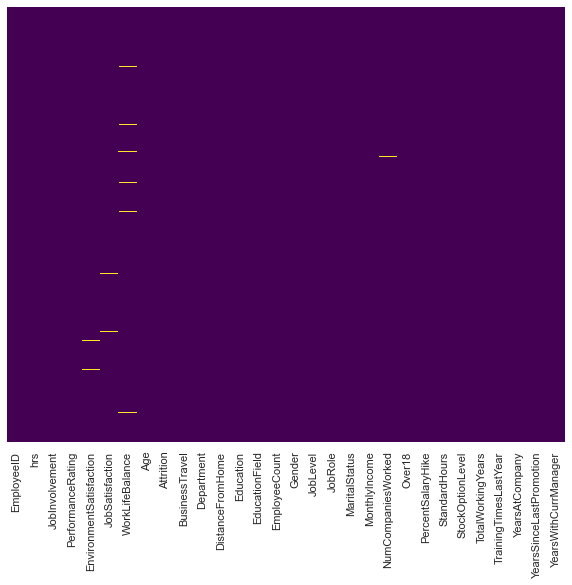

In [43]:
#checking for missing values in the final dataset
print(df.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
percent = (df.isnull().sum()/df.isnull().count())
percent

EmployeeID                 0.000000
hrs                        0.000000
JobInvolvement             0.000000
PerformanceRating          0.000000
EnvironmentSatisfaction    0.005670
JobSatisfaction            0.004536
WorkLifeBalance            0.008392
Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.004309
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.001814
TrainingTimesLastYear      0.000000
YearsAtCompany             0

In [45]:
#Few columns have missing data.We will be fillin those missing data with the mean values.

df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mean(),inplace = True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].mean(),inplace = True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mean(),inplace = True)
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean(),inplace = True)
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean(),inplace = True)

EmployeeID                 0
hrs                        0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


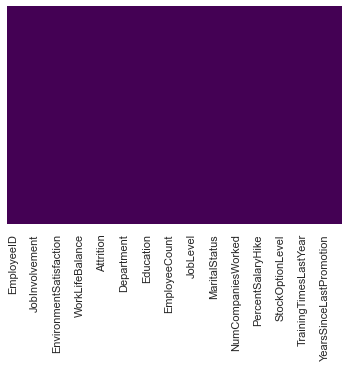

In [46]:
# Now checking again the missing values in the dataset
print(df.isnull().sum())

# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
# Dropping the useless columns. These irrelevant columns will not help us in the model building.
df.drop(['EmployeeID', 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True) 

In [48]:
# Now again looking at the dataset
df.head()

,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,7.315971,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,6.816081,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,6.789215,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,7.877561,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,10.275802,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4


In [49]:
## check duplicates
print(df.duplicated().value_counts())

False    4409
dtype: int64


## Outlier Check for dataset

* For Outliers if it is Gaussian Distribution, then we will go be standard deviation
* If it is not a Gaussian Distribution, we will go by IQR approach

{'whiskers': [<matplotlib.lines.Line2D at 0x22e00b6bee0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e00b975e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e00b6bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x22e00b97ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e00b97fa0>],
 'means': []}

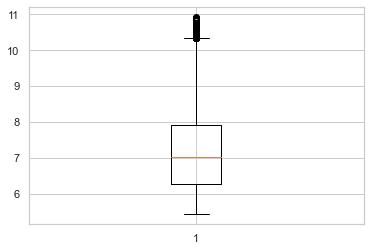

In [50]:
plt.boxplot(df['hrs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22e00bcd7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e00bcde80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e00bcd460>],
 'medians': [<matplotlib.lines.Line2D at 0x22e00c9f580>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e00c9f880>],
 'means': []}

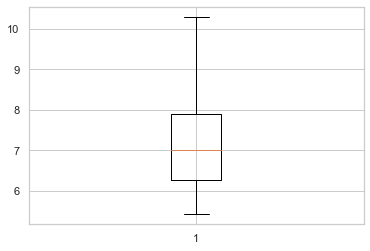

In [51]:
df['hrs']= np.where(df['hrs']>10.3,10.3,df['hrs'])
plt.boxplot(df['hrs'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x22e00ce9250>,
 'caps': [<matplotlib.lines.Line2D at 0x22e00ce9910>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e00cdbeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e00cf5040>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e00cf5340>],
 'means': []}

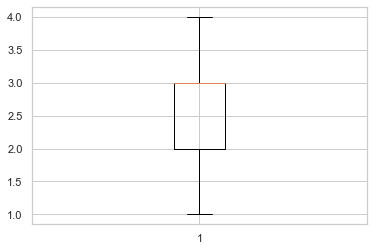

In [52]:
plt.boxplot(df['JobInvolvement'])
# no outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x22e00d36b20>,
 'caps': [<matplotlib.lines.Line2D at 0x22e00d44220>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e00d367c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e00d448e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e00d44be0>],
 'means': []}

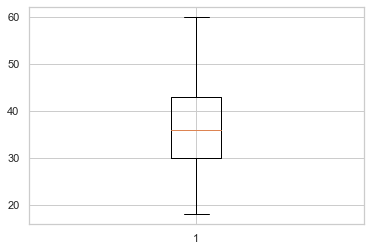

In [53]:
plt.boxplot(df['Age'])
# no outlier 

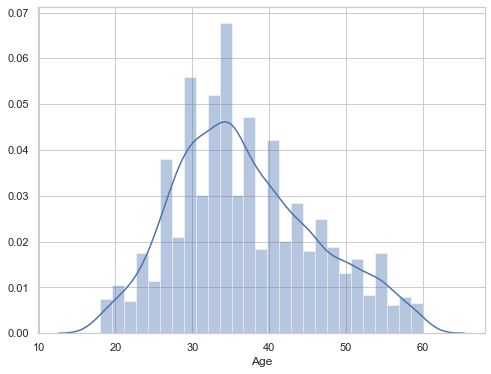

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'])

Gaussian distribution is uniform for column 'Age'

{'whiskers': [<matplotlib.lines.Line2D at 0x22e00d71c40>,
 'caps': [<matplotlib.lines.Line2D at 0x22e00a36280>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e00d71d30>],
 'medians': [<matplotlib.lines.Line2D at 0x22e049852b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e04985fd0>],
 'means': []}

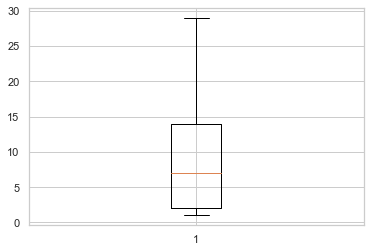

In [55]:
plt.boxplot(df['DistanceFromHome'])
# no outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x22e06b705b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e06b70c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e06b702b0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e06b78370>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e06b78670>],
 'means': []}

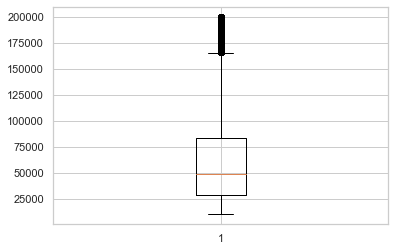

In [56]:
plt.boxplot(df['MonthlyIncome']) 

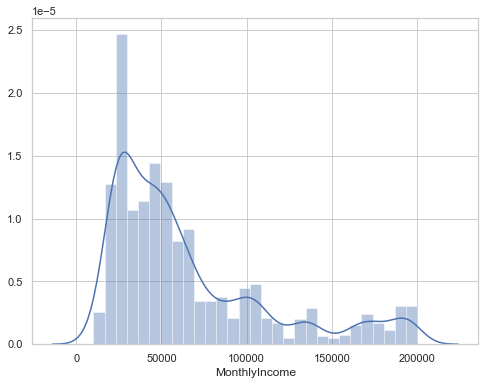

In [57]:
plt.figure(figsize=(8,6))
sns.distplot(df['MonthlyIncome'])

It is not a gaussian distribution, we will go for IQR approach

In [58]:
IQR = df['MonthlyIncome'].quantile(0.75) - df['MonthlyIncome'].quantile(0.25)
print('IQR:',IQR)

IQR: 54690.0


In [59]:
Upper_bound = df['MonthlyIncome'].quantile(0.75) + (1.5 * IQR)
lower_bound = df['MonthlyIncome'].quantile(0.25) - (1.5 * IQR)
print(Upper_bound)
print(lower_bound)

165835.0
-52925.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22e07570340>,
 'caps': [<matplotlib.lines.Line2D at 0x22e07570a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e07551fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e0757b100>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e0757b400>],
 'means': []}

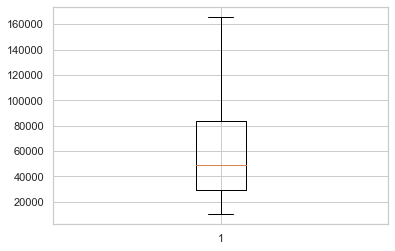

In [60]:
df.loc[df["MonthlyIncome"] > 165835, "MonthlyIncome"] = 165835
plt.boxplot(df['MonthlyIncome'])
#outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x22e075c6760>,
 'caps': [<matplotlib.lines.Line2D at 0x22e075c6e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e075c6400>],
 'medians': [<matplotlib.lines.Line2D at 0x22e075d2520>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e075d2820>],
 'means': []}

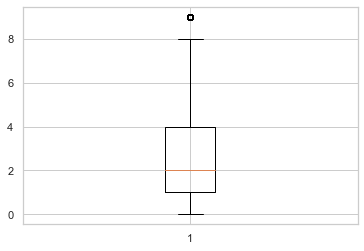

In [61]:
plt.boxplot(df['NumCompaniesWorked'])     

{'whiskers': [<matplotlib.lines.Line2D at 0x22e081e9970>,
 'caps': [<matplotlib.lines.Line2D at 0x22e081f9070>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e081e9610>],
 'medians': [<matplotlib.lines.Line2D at 0x22e081f9730>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e081f9a30>],
 'means': []}

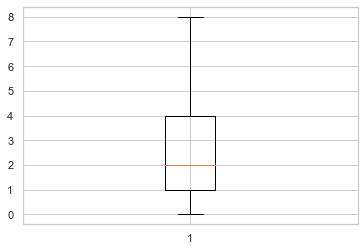

In [62]:
df['NumCompaniesWorked']= np.where(df['NumCompaniesWorked']>8,8,df['NumCompaniesWorked'])
plt.boxplot(df['NumCompaniesWorked'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x22e08248880>,
 'caps': [<matplotlib.lines.Line2D at 0x22e08248f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e08248520>],
 'medians': [<matplotlib.lines.Line2D at 0x22e08252640>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e08252940>],
 'means': []}

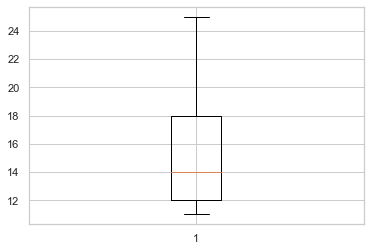

In [63]:
plt.boxplot(df['PercentSalaryHike'])
# no outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x22e10ec1ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e10ecd1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e10ec1760>],
 'medians': [<matplotlib.lines.Line2D at 0x22e10ecd880>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e10ecdb80>],
 'means': []}

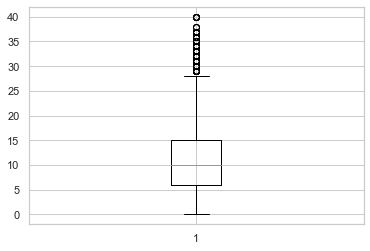

In [64]:
plt.boxplot(df['TotalWorkingYears'])         

{'whiskers': [<matplotlib.lines.Line2D at 0x22e10f29190>,
 'caps': [<matplotlib.lines.Line2D at 0x22e10f29880>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e10f19df0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e10f29f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e10f32280>],
 'means': []}

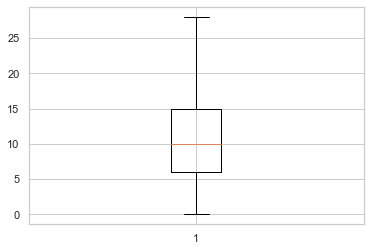

In [65]:
df['TotalWorkingYears']= np.where(df['TotalWorkingYears']>28,28,df['TotalWorkingYears'])
plt.boxplot(df['TotalWorkingYears'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x22e10f38af0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e10f5b8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e10f4af10>],
 'medians': [<matplotlib.lines.Line2D at 0x22e10f5bfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e10f862e0>],
 'means': []}

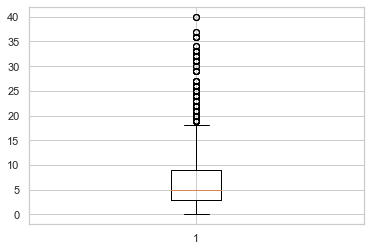

In [66]:
plt.boxplot(df['YearsAtCompany'])            

{'whiskers': [<matplotlib.lines.Line2D at 0x22e10fd6580>,
 'caps': [<matplotlib.lines.Line2D at 0x22e10fd6c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e10fd6220>],
 'medians': [<matplotlib.lines.Line2D at 0x22e10fde340>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e10fde640>],
 'means': []}

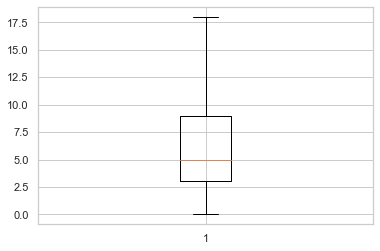

In [67]:
df['YearsAtCompany']= np.where(df['YearsAtCompany']>18,18,df['YearsAtCompany'])
plt.boxplot(df['YearsAtCompany'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x22e1102aa00>,
 'caps': [<matplotlib.lines.Line2D at 0x22e11037100>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e1102a6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e11037760>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e11037a30>],
 'means': []}

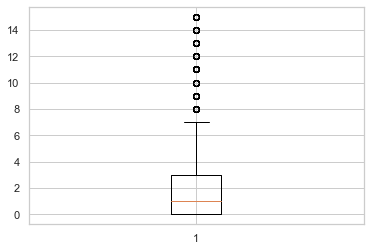

In [68]:
plt.boxplot(df['YearsSinceLastPromotion'])            

{'whiskers': [<matplotlib.lines.Line2D at 0x22e049e6550>,
 'caps': [<matplotlib.lines.Line2D at 0x22e08218220>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e075a3df0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e08226310>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e10e841f0>],
 'means': []}

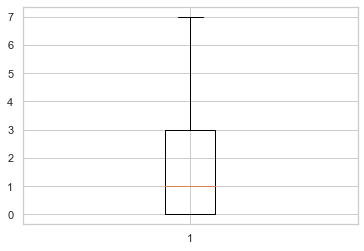

In [69]:
df['YearsSinceLastPromotion']= np.where(df['YearsSinceLastPromotion']>7,7,df['YearsSinceLastPromotion'])
plt.boxplot(df['YearsSinceLastPromotion'])
# outlier removed

{'whiskers': [<matplotlib.lines.Line2D at 0x22e10ef9880>,
 'caps': [<matplotlib.lines.Line2D at 0x22e10fa08b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e10f95d60>],
 'medians': [<matplotlib.lines.Line2D at 0x22e10eed220>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e10eed8e0>],
 'means': []}

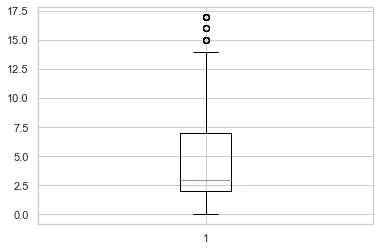

In [70]:
plt.boxplot(df['YearsWithCurrManager'])            

{'whiskers': [<matplotlib.lines.Line2D at 0x22e11069850>,
 'caps': [<matplotlib.lines.Line2D at 0x22e11069f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e110694f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e11125610>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e11125910>],
 'means': []}

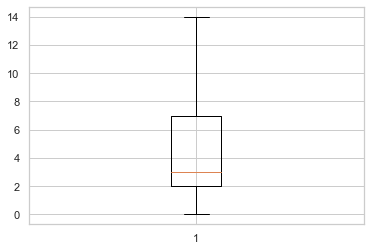

In [71]:
df['YearsWithCurrManager']= np.where(df['YearsWithCurrManager']>14,14,df['YearsWithCurrManager'])
plt.boxplot(df['YearsWithCurrManager'])
# outlier removed

### Outlier Treatment done

## Exploratory Data Analysis

In [72]:
#object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("===================================================================")

Attrition : ['No' 'Yes']
No     3698
Yes     711
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        3128
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    2882
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1818
Medical             1391
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      2645
Female    1764
Name: Gender, dtype: int64
JobRole : ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Repr

## Uni-Variate Analysis

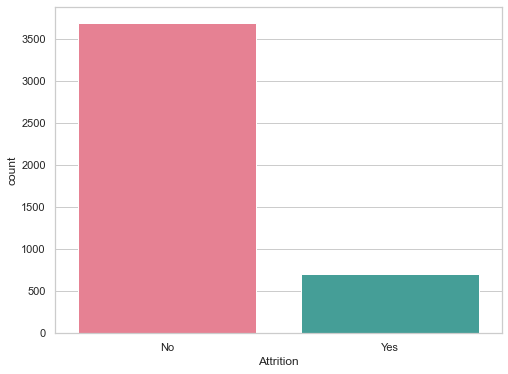

In [73]:
# the number of employees that stayed (no) and the number that left (yes) the company.
plt.figure(figsize=(8,6))
sns.countplot(x ='Attrition', data = df, palette ='husl')
plt.show()

#### Over here we see that maximum employees stayed at the company (No) and less employees have left the company
#### After checking the plot, it implies that this Phoenix Global data is imbalanced. We will use SMOTE technique to balance the data

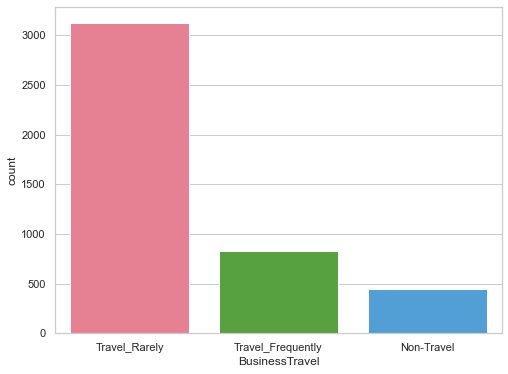

In [74]:
plt.figure(figsize=(8,6))
sns.countplot(x ='BusinessTravel', data = df, palette ='husl')
plt.show()

#### We can see that employees who left the company are mostly travelling rarely followed by frequent travel employees

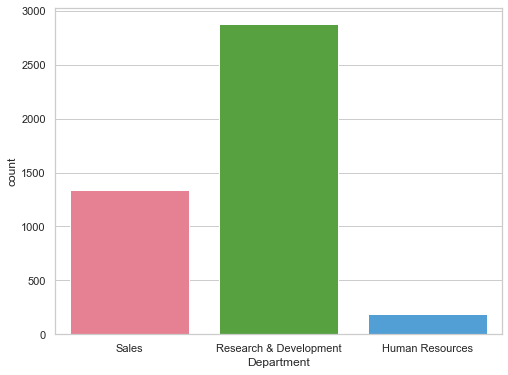

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Department', data = df, palette ='husl')
plt.show()

#### Over here the employees that worked in the Research & Development Department have most attritions and very less attritions are seen from the Human Resources department

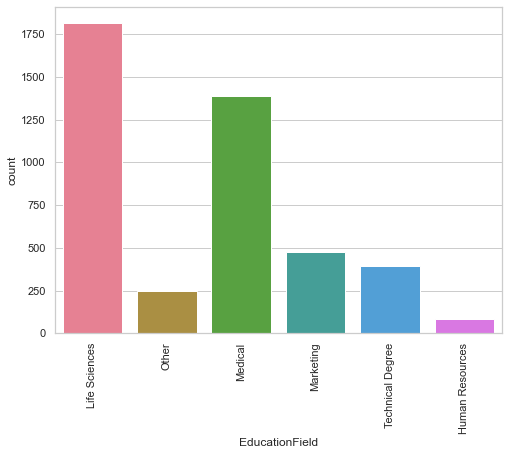

In [76]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x ='EducationField', data = df, palette ='husl')
plt.show() 

#### The maximum attritions is seen where the employee's have the educationfield in Life Sciences followed by Medical

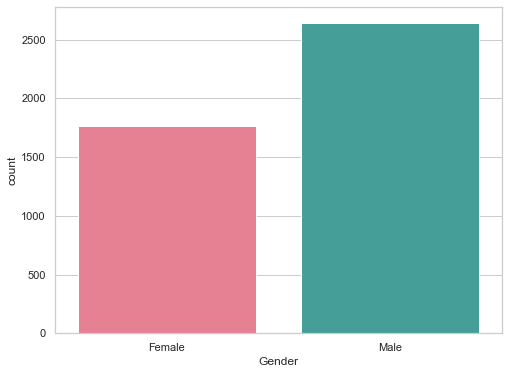

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Gender', data = df, palette ='husl')
plt.show()

#### Most employees who left the company is male

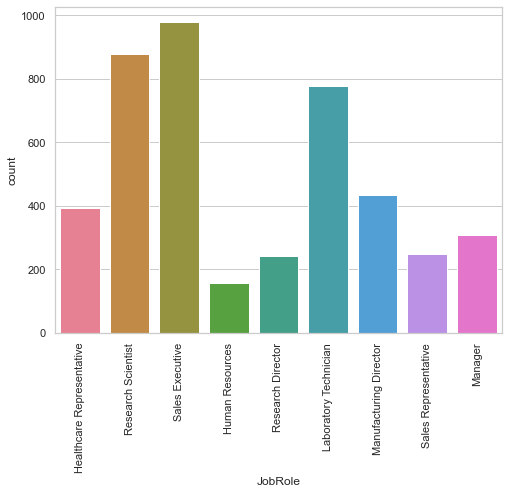

In [78]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x ='JobRole', data = df, palette ='husl')
plt.show()

#### We can see that most employees roles who left is Sales Executive followed by Research Scientist and Laboratory Technician

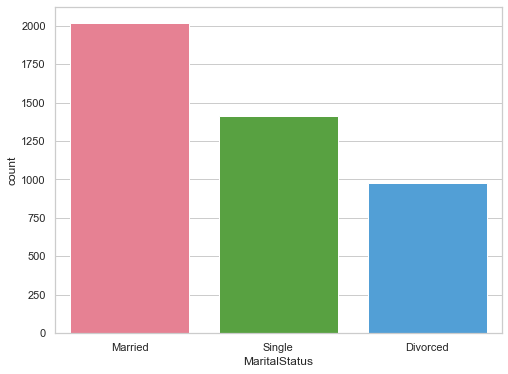

In [79]:
plt.figure(figsize=(8,6))
sns.countplot(x ='MaritalStatus', data = df, palette ='husl')
plt.show()

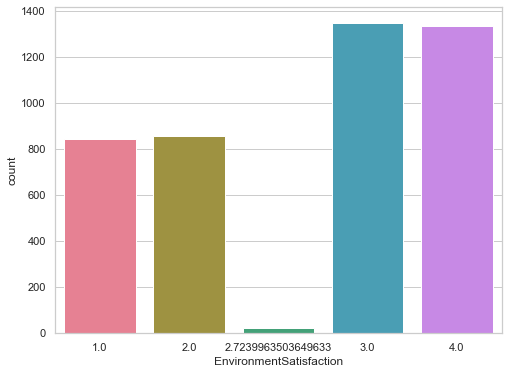

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(x ='EnvironmentSatisfaction', data = df, palette ='husl')
plt.show()

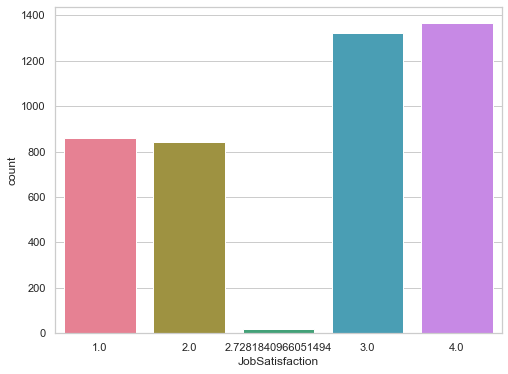

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(x ='JobSatisfaction', data = df, palette ='husl')
plt.show()

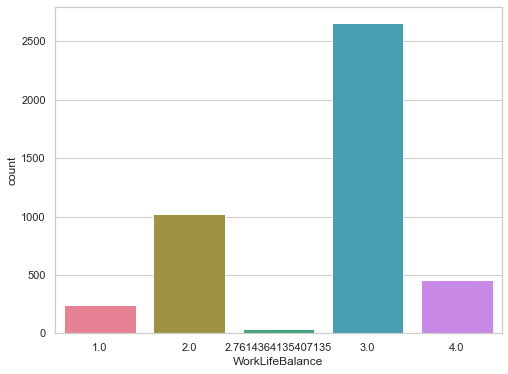

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x ='WorkLifeBalance', data = df, palette ='husl')
plt.show()

#### Most of the employees who left the company has normal Work Life Balance

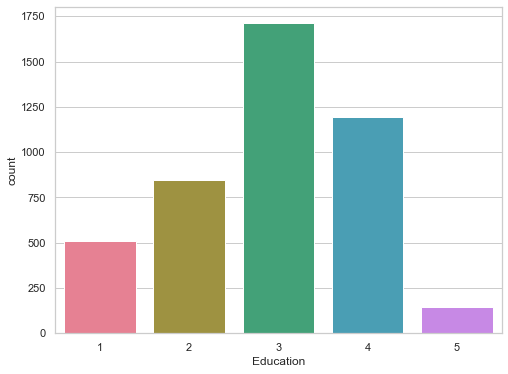

In [83]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Education', data = df, palette ='husl')
plt.show()

#### Most employees who left has 3 education level followed by 4 and the least employees who left has 5 education level

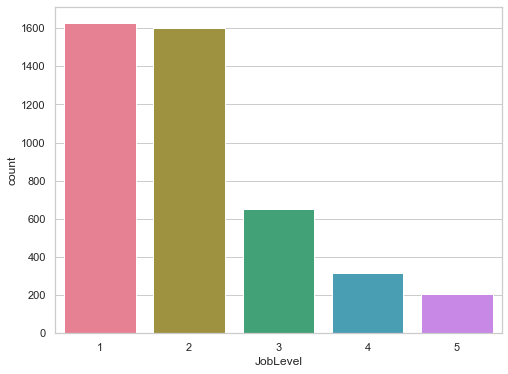

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(x ='JobLevel', data = df, palette ='husl')
plt.show()

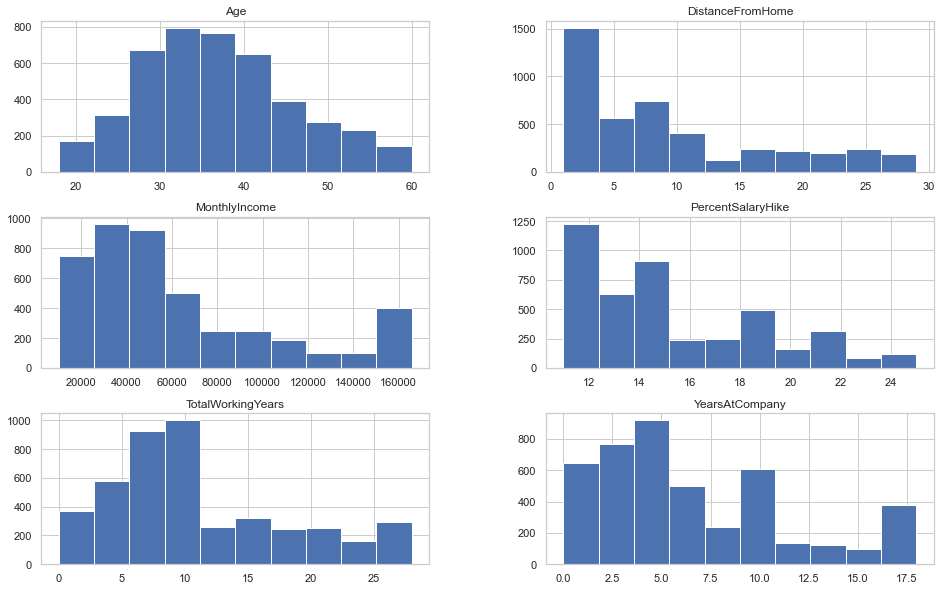

In [85]:
# For Numerical variables
columns = df.columns.tolist()
num_col = ['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
df[num_col].hist(figsize=(16,10))
plt.show()

#### Age Feature Distribution is almost Normal Distribution
#### Most of the Columns are in Skew Distribution form except Age

## Bi-Variate Analysis

In [86]:
cat_col = ['Attrition','BusinessTravel', 'Department','Education','EducationField', 'Gender', 
           'JobLevel', 'JobRole', 'MaritalStatus']

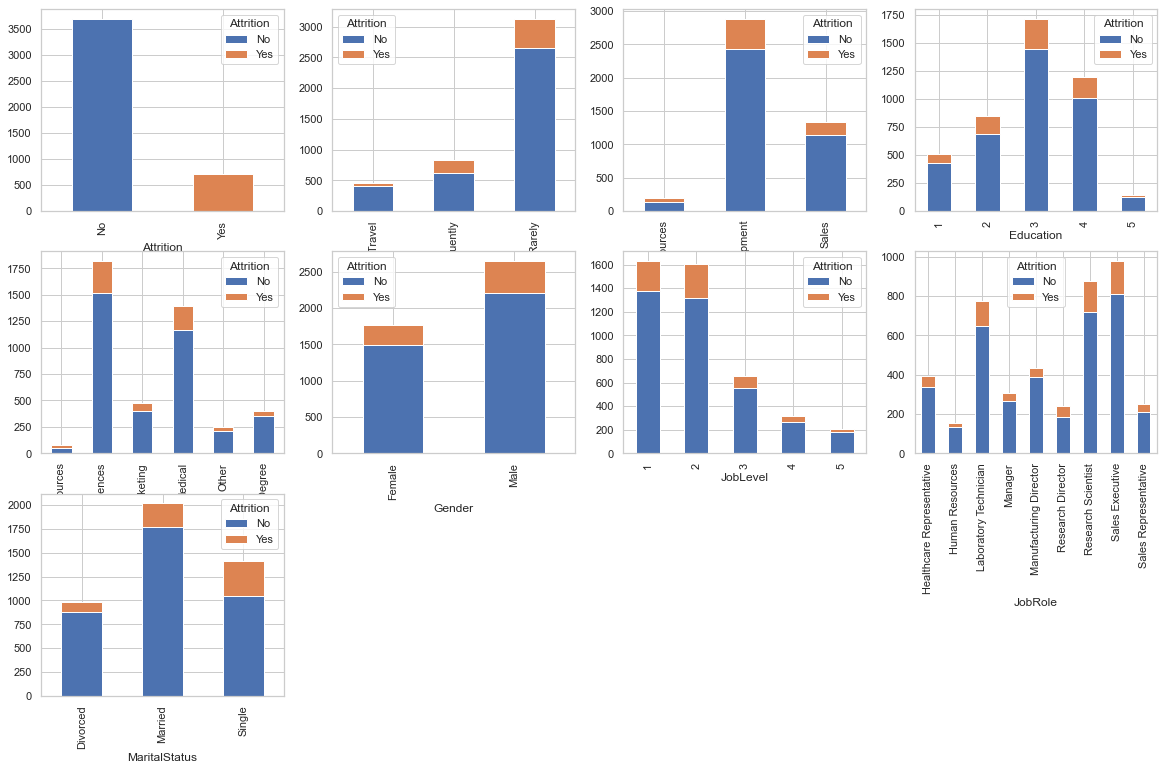

In [87]:
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(cat_col):
    crosstab = pd.crosstab(index=df[i], columns=df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)

### Boxplots for Continuous Vs Categorical columns

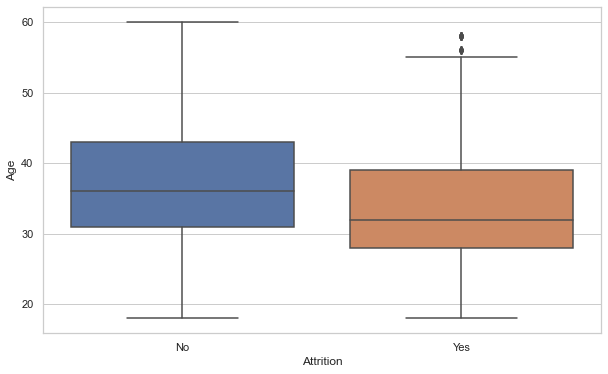

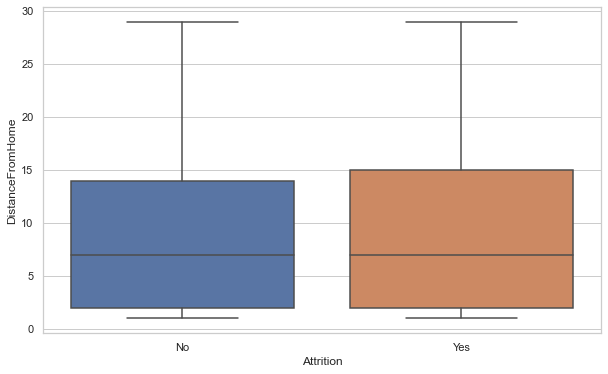

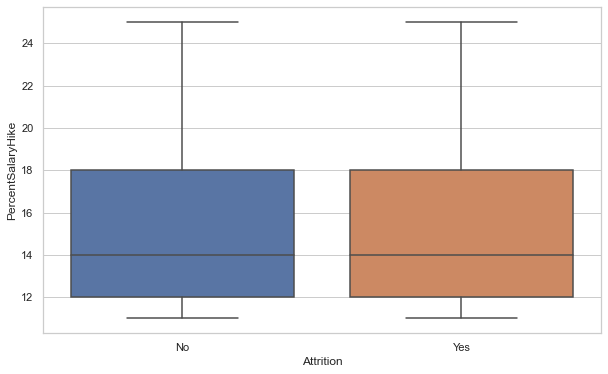

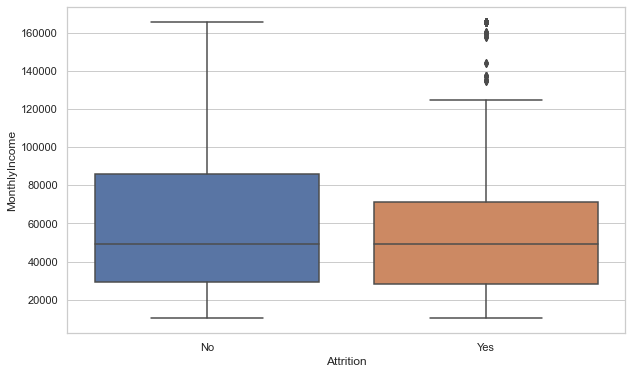

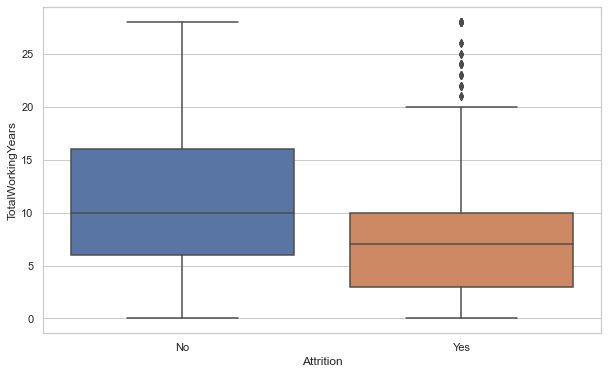

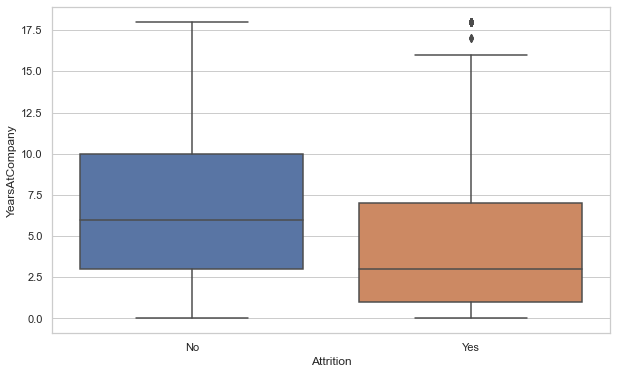

In [88]:
for col in num_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x = "Attrition", y = col, data=df)
    plt.show()

## Mutivariate Analysis

### PairPlots

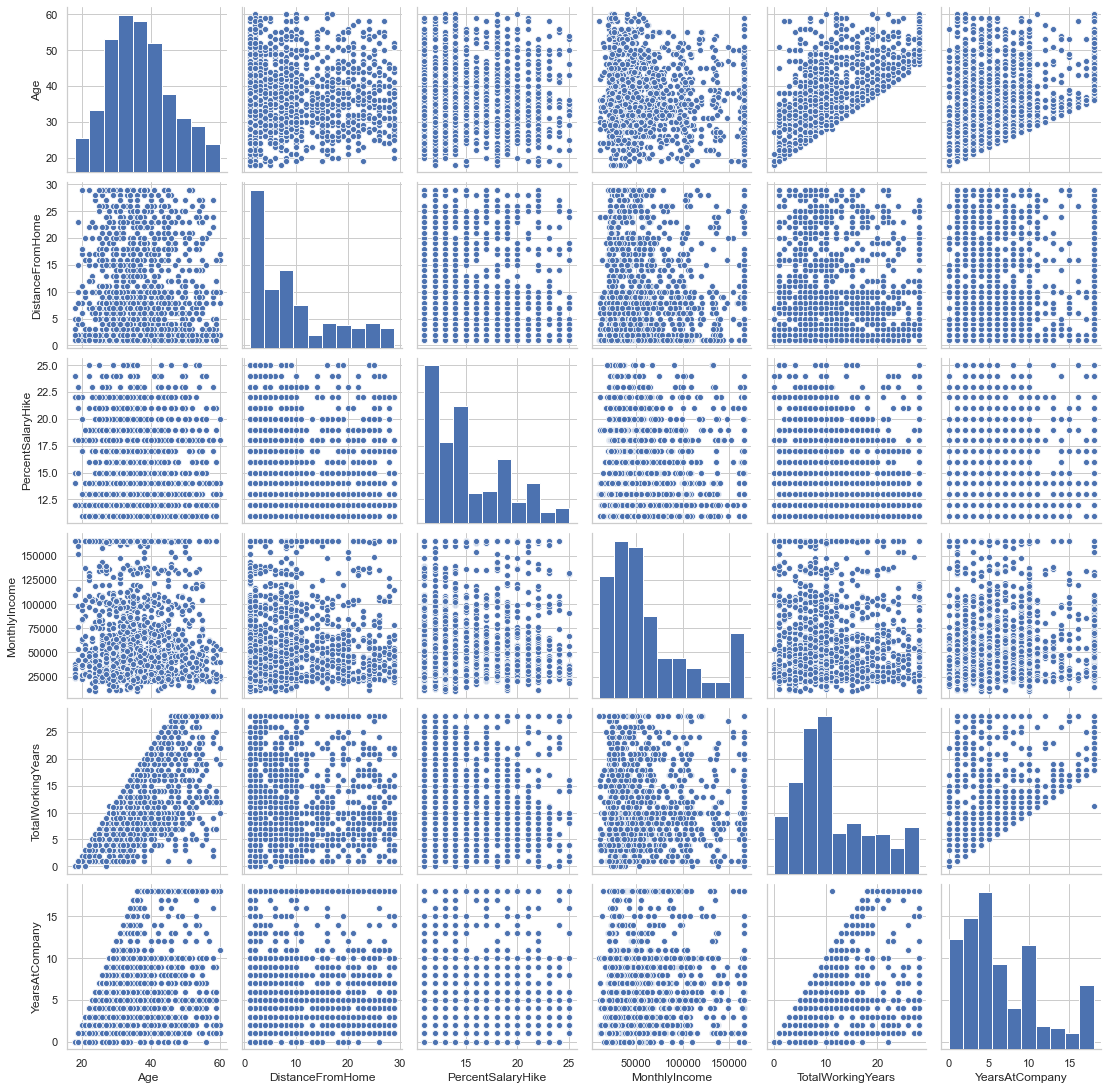

In [90]:
# Let's look at the pairplot for numerical variables
sns.set_style('whitegrid')
sns.pairplot(df[num_col])
plt.show()

## Feature Engineering

In [91]:
# Here, changing the dependent variable in 1's and 0's form.
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

In [92]:
df.head()

,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,7.315971,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,6.816081,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,6.789215,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,Married,165835,1.0,15,3,5.0,2,5,0,3
3,7.877561,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,10.275802,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4


In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [94]:
# creating dummies for categorical variables
X_Dummies = pd.get_dummies(df[['BusinessTravel', 'Department','EducationField', 
                                 'Gender', 'JobRole', 'MaritalStatus']])
X_Dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [95]:
X_Dummies.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [96]:
# merging both dummies data for categorical var and the original data using pd.concat
df_final = pd.concat([df,X_Dummies],axis=1)

In [97]:
df_final.head()

,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,7.315971,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,0,0,0,0,0,0,0,0,1,0
1,6.816081,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,0,0,0,0,1,0,0,0,0,1
2,6.789215,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,0,0,0,0,0,1,0,0,1,0
3,7.877561,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,0,0,0,0,0,0,0,0,1,0
4,10.275802,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,0,0,0,0,0,1,0,0,0,1


In [98]:
# dropping the repeated columns 
df_final = df_final.drop(['BusinessTravel', 'Department','EducationField', 
                                 'Gender', 'JobRole', 'MaritalStatus'],axis=1)

In [99]:
df_final.head()

,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,7.315971,3,3,3.0,4.0,2.0,51,0,6,2,...,0,0,0,0,0,0,0,0,1,0
1,6.816081,2,4,3.0,2.0,4.0,31,1,10,1,...,0,0,0,0,1,0,0,0,0,1
2,6.789215,3,3,2.0,2.0,1.0,32,0,17,4,...,0,0,0,0,0,1,0,0,1,0
3,7.877561,2,3,4.0,4.0,3.0,38,0,2,5,...,0,0,0,0,0,0,0,0,1,0
4,10.275802,3,3,4.0,1.0,3.0,32,0,10,1,...,0,0,0,0,0,1,0,0,0,1


In [100]:
df_final.shape

(4409, 46)

## Statistical Testing
* Correlation Test
* ANOVA Test 
* Chi-Square Test

## Correlation Test

In [101]:
# Correlation Matrix for numerical variables
num_data = df_final[['hrs','Age','JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                    'JobSatisfaction', 'WorkLifeBalance','DistanceFromHome','JobLevel','NumCompaniesWorked',
                     'StockOptionLevel','TrainingTimesLastYear','PercentSalaryHike','MonthlyIncome','TotalWorkingYears',
                     'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].corr()
num_data

,hrs,Age,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DistanceFromHome,JobLevel,NumCompaniesWorked,StockOptionLevel,TrainingTimesLastYear,PercentSalaryHike,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
hrs,1.000000,0.020042,0.017434,-0.038381,0.011500,0.023667,0.029597,0.005799,0.010286,-0.003848,-0.000255,0.010636,-0.011474,0.006710,0.006466,0.006746,0.001806,-0.021762
Age,0.020042,1.000000,0.018066,-0.025531,0.010196,-0.003099,-0.021191,0.006790,-0.002879,0.304403,-0.031685,-0.027517,-0.033073,-0.046978,0.677871,0.278541,0.187888,0.201145
JobInvolvement,0.017434,0.018066,1.000000,0.010876,0.016003,0.003955,-0.019345,-0.002780,-0.012611,0.030928,0.010677,-0.011161,-0.004304,0.022411,0.001288,0.004875,0.038079,-0.001993
PerformanceRating,-0.038381,-0.025531,0.010876,1.000000,0.013867,0.043190,-0.022966,0.036666,-0.002480,0.016748,-0.036442,-0.022672,0.773549,0.016384,-0.003643,-0.010598,-0.015157,-0.006982
EnvironmentSatisfaction,0.011500,0.010196,0.016003,0.013867,1.000000,-0.006437,0.024209,0.020960,-0.024437,0.012382,-0.004920,0.018886,0.000523,-0.006575,-0.009692,0.001777,0.019325,-0.006413
JobSatisfaction,0.023667,-0.003099,0.003955,0.043190,-0.006437,1.000000,-0.018980,-0.011256,-0.018227,-0.057501,0.039877,-0.021637,0.030808,0.005966,-0.017036,0.003888,-0.010158,-0.023537
WorkLifeBalance,0.029597,-0.021191,-0.019345,-0.022966,0.024209,-0.018980,1.000000,0.007966,-0.027538,-0.007896,-0.022789,-0.015725,-0.040413,0.006999,0.004162,0.017691,0.011754,0.005418
DistanceFromHome,0.005799,0.006790,-0.002780,0.036666,0.020960,-0.011256,0.007966,1.000000,-0.037322,-0.017983,0.011668,-0.010322,0.038613,-0.024161,0.007693,0.024293,0.004490,0.021353
JobLevel,0.010286,-0.002879,-0.012611,-0.002480,-0.024437,-0.018227,-0.027538,-0.037322,1.000000,-0.009865,0.000981,-0.032490,0.010962,0.047398,-0.036518,-0.059787,-0.050590,-0.053467
NumCompaniesWorked,-0.003848,0.304403,0.030928,0.016748,0.012382,-0.057501,-0.007896,-0.017983,-0.009865,1.000000,0.019250,-0.033303,0.028669,-0.024696,0.252781,-0.121653,-0.051290,-0.111993


### HEAT MAP

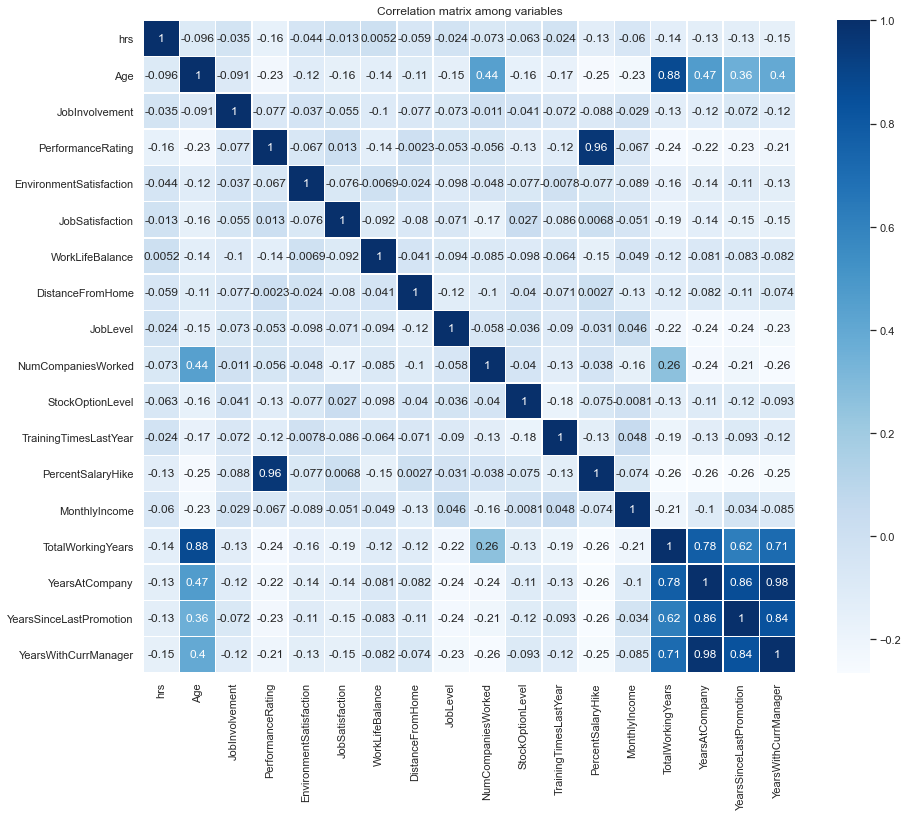

In [102]:
plt.figure(figsize=(15,12))
sns.heatmap(num_data.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

## ANOVA Test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

H0- Null hypothesis means the variables are not correlated:
1. If Small P-Value < 5% (0.05)  means the variables are correlated. Null hypothesis H0 is rejected
2. If Large P-Value > 5% (0.05) means the variables are not correlated and the Null hypothesis H0 is accepted

In [103]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
            print("===================================================================================\n")
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            print("===================================================================================\n")

    return(SelectedPredictors)

In [104]:
FunctionAnova(inpData=df_final, TargetVariable="Attrition", ContinuousPredictorList=num_data)

##### ANOVA Results ##### 

hrs is NOT correlated with Attrition | P-Value: 0.9608044113031873

Age is correlated with Attrition | P-Value: 2.0643297829987788e-26

JobInvolvement is NOT correlated with Attrition | P-Value: 0.3061115440772275

PerformanceRating is NOT correlated with Attrition | P-Value: 0.12090298554638235

EnvironmentSatisfaction is correlated with Attrition | P-Value: 1.140775918405145e-11

JobSatisfaction is correlated with Attrition | P-Value: 8.092760229853803e-12

WorkLifeBalance is correlated with Attrition | P-Value: 3.2239581946779896e-05

DistanceFromHome is NOT correlated with Attrition | P-Value: 0.5280432738303005

JobLevel is NOT correlated with Attrition | P-Value: 0.494315556720321

NumCompaniesWorked is correlated with Attrition | P-Value: 0.006705381475820305

StockOptionLevel is NOT correlated with Attrition | P-Value: 0.6453826659212034

TrainingTimesLastYear is correlated with Attrition | P-Value: 0.0010784425601484174

PercentSalaryHike is correla

['Age',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'PercentSalaryHike',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [105]:
# we wil drop the columns which have high p-values
df_final.drop(['hrs','JobInvolvement','PerformanceRating','DistanceFromHome','JobLevel','StockOptionLevel'], axis = 1, inplace=True)

## Chi-Square Test for Categorical variables

In [106]:
cat_col_chisq = ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male','JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single']

In [107]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### chi-square Results ##### \n')
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            SelectedPredictors.append(predictor)
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            print("===================================================================================\n")
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            print("===================================================================================\n")
    return(SelectedPredictors)

In [108]:
# Calling the function
FunctionChisq(inpData=df_final, 
              TargetVariable="Attrition",
              CategoricalVariablesList= cat_col_chisq)

##### chi-square Results ##### 

BusinessTravel_Non-Travel is correlated with Attrition | P-Value: 1.067598603648445e-06

BusinessTravel_Travel_Frequently is correlated with Attrition | P-Value: 3.190483955983751e-14

BusinessTravel_Travel_Rarely is correlated with Attrition | P-Value: 0.001194336596438144

Department_Human Resources is correlated with Attrition | P-Value: 1.4354363545996473e-07

Department_Research & Development is NOT correlated with Attrition | P-Value: 0.3327426211785379

Department_Sales is NOT correlated with Attrition | P-Value: 0.20381195062145774

EducationField_Human Resources is correlated with Attrition | P-Value: 3.0802836676910647e-09

EducationField_Life Sciences is NOT correlated with Attrition | P-Value: 0.43779112305031354

EducationField_Marketing is NOT correlated with Attrition | P-Value: 0.851343434025749

EducationField_Medical is NOT correlated with Attrition | P-Value: 0.9869323282922584

EducationField_Other is NOT correlated with Attrition | 

['BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'EducationField_Human Resources',
 'EducationField_Technical Degree',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [109]:
# we wil drop the columns which have high p-values
df_final.drop(['JobRole_Sales Representative','JobRole_Sales Executive','JobRole_Research Scientist','JobRole_Manager',
              'JobRole_Laboratory Technician','JobRole_Human Resources','JobRole_Healthcare Representative',
              'Gender_Male','Gender_Female','EducationField_Other','EducationField_Medical','EducationField_Marketing',
              'EducationField_Life Sciences','Department_Sales','Department_Research & Development'], axis = 1, inplace=True)

## Creating the Independendent and Dependent Data Sets

In [110]:
# Feature or Independent variables
X = df_final.drop(["Attrition"],axis = 1)

In [111]:
X.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,EducationField_Human Resources,EducationField_Technical Degree,JobRole_Manufacturing Director,JobRole_Research Director,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,3.0,4.0,2.0,51,2,131160,1.0,11,1.0,6,...,0,1,0,0,0,0,0,0,1,0
1,3.0,2.0,4.0,31,1,41890,0.0,23,6.0,3,...,1,0,0,0,0,0,0,0,0,1
2,2.0,2.0,1.0,32,4,165835,1.0,15,5.0,2,...,1,0,0,0,0,0,0,0,1,0
3,4.0,4.0,3.0,38,5,83210,3.0,11,13.0,5,...,0,0,0,0,0,0,0,0,1,0
4,4.0,1.0,3.0,32,1,23420,4.0,12,9.0,2,...,0,1,0,0,0,0,0,0,0,1


In [112]:
# Label or Dependent variable
y = df_final["Attrition"]

In [113]:
y

0       0
1       1
2       0
3       0
4       0
       ..
4404    0
4405    0
4406    0
4407    0
4408    0
Name: Attrition, Length: 4409, dtype: int64

## Feature Importance

In [114]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

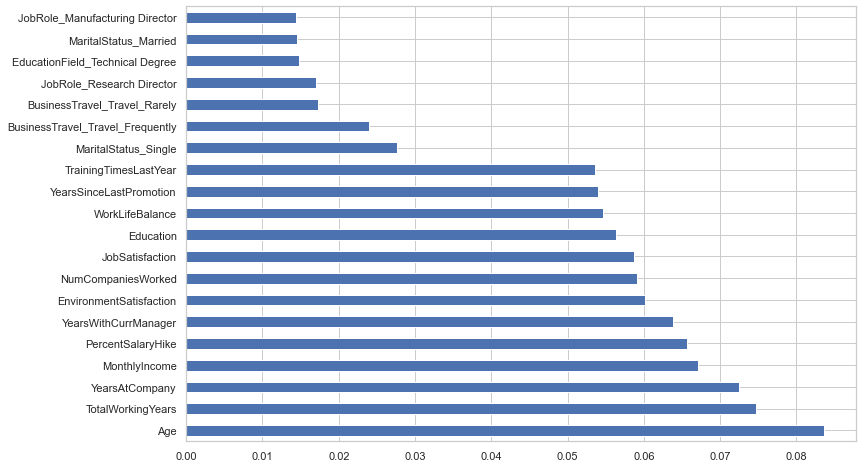

In [115]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Age appears to be the most important feature followed by the employee's TotalWorkingYears, MonthlyIncome and YearsAtCompany

## Model Building

In [116]:
# Splitting the dataset into the Training set and Test set

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [118]:
X_train.shape

(3086, 24)

In [119]:
X_test.shape

(1323, 24)

In [120]:
y_train.shape

(3086,)

In [121]:
y_test.shape

(1323,)

## Standarisation of data

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [124]:
X_test_scaled = scaler.transform(X_test)

## Synthetic Minority Oversampling Technique (SMOTE) to solve the problem of Imbalanced Data

In [125]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [126]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 2589, 1: 497})
After oversampling:  Counter({0: 2589, 1: 2589})


## Logistic Regression Model

In [127]:
# Fitting Multiple Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression()

## Prediction of the Model

In [128]:
# Predicting the Test (Test_Scaled) set results 
y_pred = classifier.predict(X_test_scaled)

In [129]:
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [131]:
confusion_matrix

array([[781, 328],
       [ 65, 149]], dtype=int64)

## Performance Measurement
#### 1. Confusion Matrix
- Each row: actual class
- Each column: predicted class

#### 2. Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

#### 3. Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ 

#### 4. F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.

### Confusion Matrix

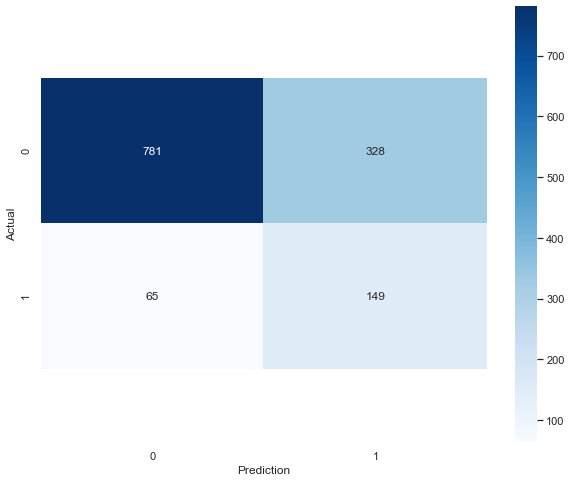

In [132]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [133]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print("=======================================================================\n")
print(classification_report(y_test, y_pred))
print("=======================================================================\n")
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1109
           1       0.31      0.70      0.43       214

    accuracy                           0.70      1323
   macro avg       0.62      0.70      0.62      1323
weighted avg       0.82      0.70      0.74      1323


Accuracy of logistic regression classifier on test set: 0.70


In [134]:
from sklearn.metrics import mean_squared_error

In [136]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.545025


## ROC AUC CURVE
ROC curve plots the true positive rate against false positive rate

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score

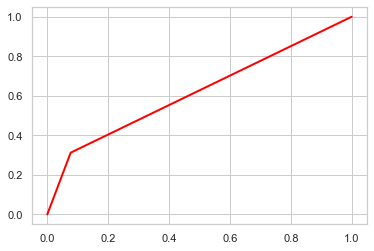

In [138]:
##Computing false and true positive rates
fpr, tpr,_= roc_curve(classifier.predict(X_test_scaled),y_test,drop_intermediate=False)

#plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

In [139]:
roc_auc_score(classifier.predict(X_test_scaled),y_test)

0.6177684107230474

## Support vector classifier

In [140]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [141]:
# Initiate the SVC classifier 
svc = SVC(C =  10, gamma = 0.01, kernel = 'rbf')

In [142]:
# Fit on training set
svc = svc.fit(X_train_SMOTE, y_train_SMOTE)

In [143]:
# Predict on test set
sv_pred = svc.predict(X_test_scaled)

In [144]:
# Compute confustion matrix
svc_conf = confusion_matrix(y_test, sv_pred)
svc_conf

array([[917, 192],
       [ 48, 166]], dtype=int64)

### Confusion Matrix

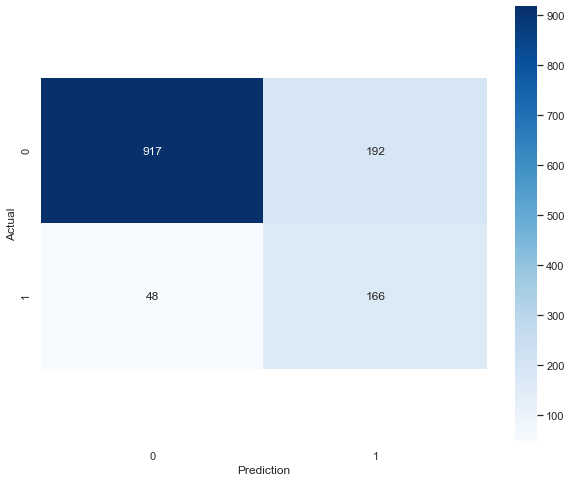

In [145]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(svc_conf), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [146]:
#### CLASSIFICATION REPORT ####
print("=======================================================================\n")
print(classification_report(y_test, sv_pred))
print("=======================================================================\n")
print('Accuracy of Support vector classifier on test set: {:.2f}'.format(svc.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1109
           1       0.46      0.78      0.58       214

    accuracy                           0.82      1323
   macro avg       0.71      0.80      0.73      1323
weighted avg       0.87      0.82      0.84      1323


Accuracy of Support vector classifier on test set: 0.82


In [147]:
# RMSE of SVM
rmse = np.sqrt(mean_squared_error(y_test, sv_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.425918


## Decision Tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtc = DecisionTreeClassifier()

In [150]:
# Fit on training set
dtc.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

In [151]:
# Predict on test set
dt_pred = dtc.predict(X_test_scaled)

In [152]:
# Compute confustion matrix
dtc_conf = confusion_matrix(y_test, dt_pred)
dtc_conf

array([[1085,   24],
       [  11,  203]], dtype=int64)

### Confusion Matrix

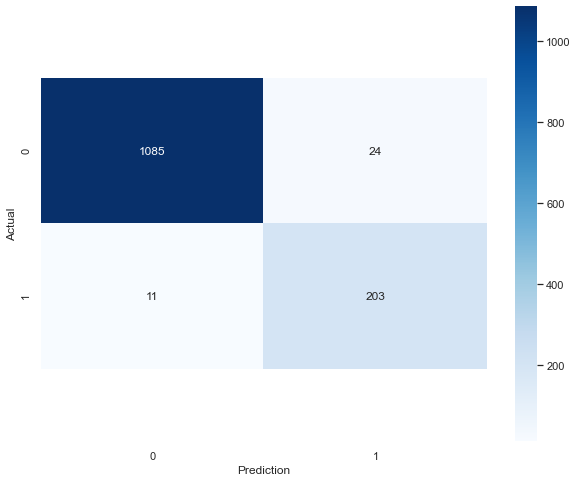

In [153]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(dtc_conf), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [154]:
#### CLASSIFICATION REPORT ####
print("=======================================================================\n")
print(classification_report(y_test, dt_pred))
print("=======================================================================\n")
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1109
           1       0.89      0.95      0.92       214

    accuracy                           0.97      1323
   macro avg       0.94      0.96      0.95      1323
weighted avg       0.97      0.97      0.97      1323


Accuracy of Decision Tree Classifier on test set: 0.97


In [155]:
# RMSE of Decision Tree
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.162650


## Gradient boosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
# Initiate the gradient boosting classifier 
gb = GradientBoostingClassifier(learning_rate = 0.3, max_depth = 2, n_estimators = 10)

In [158]:
# Fit on training set
gb = gb.fit(X_train_SMOTE, y_train_SMOTE)

In [159]:
# Predict on test set
gb_pred = gb.predict(X_test_scaled)

In [160]:
# Compute confustion matrix
gb_conf = confusion_matrix(y_test, gb_pred)
gb_conf

array([[940, 169],
       [120,  94]], dtype=int64)

### Confusion Matrix

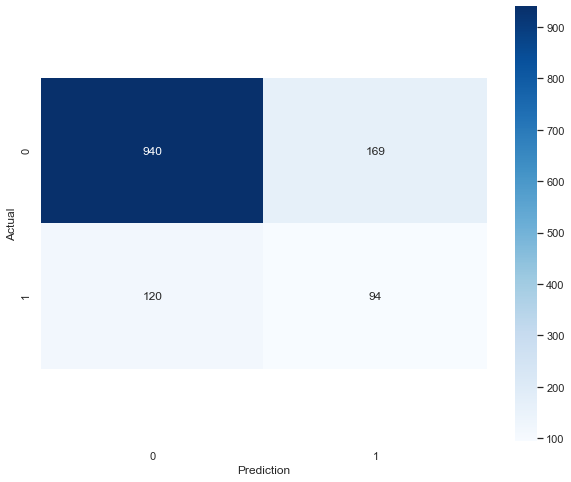

In [161]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(gb_conf), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [162]:
#### CLASSIFICATION REPORT ####
print("=======================================================================\n")
print(classification_report(y_test, gb_pred))
print("=======================================================================\n")
print('Accuracy of Gradient boosting classifier on test set: {:.2f}'.format(gb.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1109
           1       0.36      0.44      0.39       214

    accuracy                           0.78      1323
   macro avg       0.62      0.64      0.63      1323
weighted avg       0.80      0.78      0.79      1323


Accuracy of Gradient boosting classifier on test set: 0.78


In [163]:
# RMSE of Gradient Boosting
rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.467379


## Random Forest Model

In [164]:
# building random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [165]:
# predicting the test results
rfc_pred = rfc.predict(X_test_scaled)
rfc_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [167]:
cm

array([[1106,    3],
       [   9,  205]], dtype=int64)

### Confusion Matrix

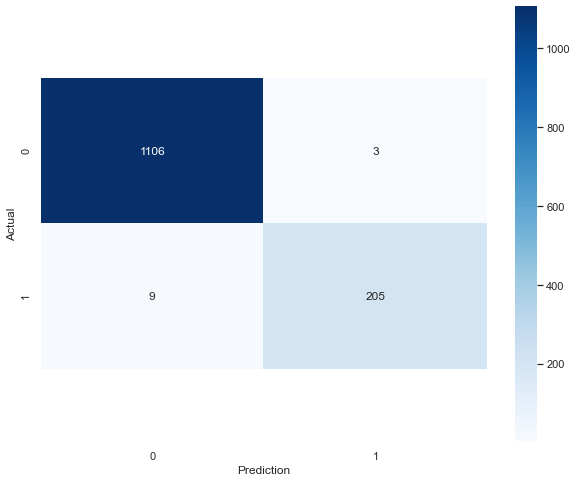

In [168]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [169]:
#### CLASSIFICATION REPORT ####
print("=======================================================================\n")
print(classification_report(y_test, rfc_pred))
print("=======================================================================\n")
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rfc.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1109
           1       0.99      0.96      0.97       214

    accuracy                           0.99      1323
   macro avg       0.99      0.98      0.98      1323
weighted avg       0.99      0.99      0.99      1323


Accuracy of Random Forest Classifier on test set: 0.99


In [170]:
# RMSE of RF
rmse = np.sqrt(mean_squared_error(y_test, rfc_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.095238


## Model Results

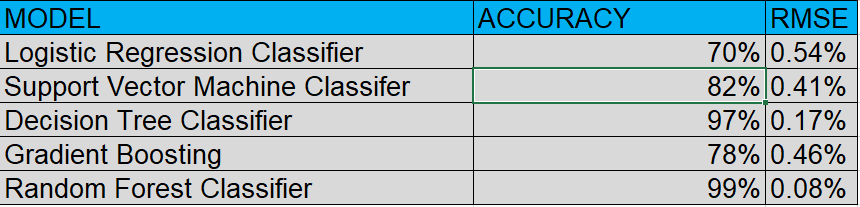

### If we compare logistic regression model with all the models, the random forest classifier yielded the best results in terms of the accurcay and f1-score.

## Insights and Business Recommendations on Phoenix Global Data
===============================================================================================================================
#### Insights
* From feature importance, we find that Age appears to be the most important feature followed by the employee's TotalWorkingYears, MonthlyIncome and YearsAtCompany


* Digging further we found also that the employees who left the company worked in the Research & Development department and Sales department and more specifically those who had Sales executive, Research scientist and Laboratory technicians as their Job role.


* We observed that most of the employees who left the company has normal Work Life Balance and employees with education level 3 and 4 had most attritions and the least attritions were seen with employees having education level 5.


* Most attritions is seen where the employee is travelling rarely.


* If we go by Random forest or Decision tree approach for model building, we will yield a nice accuracy and less root mean square error. Here we are getting a 99% accuracy and less than 10 % Rmse from Random forest model approach.

#### Recommendations
* So my recommendation is to check the job satisfaction and environment satisfaction to lower the risk of attrition.


* Employees who didn't get promoted since last 5 years have higher risk of attrition.


* More years an employee spends with the manager lesser the risk of attrition.


* If the employee travels frequently then it can lead to a higher risk of attrition

===============================================================================================================================
